@[toc](目录)

**Pytorch一般有以下几个流程**


### 1.数据读取

### 2.数据处理

### 3.搭建网络

### 4.模型训练

### 5.模型上线


主要包括以上几个阶段，每个阶段又可以细分，后面再说


### 1.数据读取
CIFAR-10 是由 Hinton 的学生 Alex Krizhevsky 和 Ilya Sutskever 整理的一个用于识别普适物体的小型数据集。一共包含 10 个类别的 RGB 彩色图 片：飞机（ arplane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。图片的尺寸为 32×32 ，数据集中一共有 50000 张训练圄片和 10000 张测试图片。 

与 MNIST 数据集中目比， CIFAR-10 具有以下不同点：

    • CIFAR-10 是 3 通道的彩色 RGB 图像，而 MNIST 是灰度图像。
    • CIFAR-10 的图片尺寸为 32×32， 而 MNIST 的图片尺寸为 28×28，比 MNIST 稍大。
    • 相比于手写字符， CIFAR-10 含有的是现实世界中真实的物体，不仅噪声很大，而且物体的比例、 特征都不尽相同，这为识别带来很大困难。

首先使用`torchvision`加载和归一化我们的训练数据和测试数据。

    a、`torchvision`这个东西，实现了常用的一些深度学习的相关的图像数据的加载功能，比如cifar10、Imagenet、Mnist等等的，保存在`torchvision.datasets`模块中。
    
    b、同时，也封装了一些处理数据的方法。保存在`torchvision.transforms`模块中
    
    c、还封装了一些模型和工具封装在相应模型中,比如`torchvision.models`当中就包含了AlexNet，VGG，ResNet，SqueezeNet等模型。

In [1]:
#首先导入torch，torchvision模块

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

**由于torchvision的datasets的输出是[0,1]的PILImage，所以我们先先归一化为[-1,1]的Tensor**

首先定义了一个变换transform，利用的是上面提到的transforms模块中的Compose( )把多个变换组合在一起，可以看到这里面组合了ToTensor和Normalize这两个变换

`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`前面的（0.5，0.5，0.5） 是 R G B 三个通道上的均值， 后面(0.5, 0.5, 0.5)是三个通道的标准差，注意通道顺序是 R G B ，用过opencv的同学应该知道openCV读出来的图像是 BRG顺序。这两个tuple数据是用来对RGB 图像做归一化的，如其名称 Normalize 所示这里都取0.5只是一个近似的操作，实际上其均值和方差并不是这么多，但是就这个示例而言 影响可不计。精确值是通过分别计算R,G,B三个通道的数据算出来的。


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

In [3]:
# datasets.CIFAR10( )也是封装好了的，就在我前面提到的torchvision.datasets块中
trainset = datasets.CIFAR10(root='D:/CIFAR-10', train=True,download=True, transform=transform)

Files already downloaded and verified


 `trainloader`其实是一个比较重要的东西，我们后面就是通过`trainloader`把数据传入网络，当然这里的`trainloader`其实是个变量名，可以随便取，重点是他是由后面的`torch.utils.data.DataLoader()`定义的，这个东西来源于`torch.utils.data`模块

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,shuffle=True, num_workers=2)

In [5]:
# 对于测试集的操作和训练集一样，我就不赘述了
testset = torchvision.datasets.CIFAR10(root='D:/CIFAR-10', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,shuffle=False, num_workers=2)
    # 类别信息也是需要我们给定的
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [6]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

### 2. 查看数据（格式，大小，形状）

In [8]:
trainset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
trainset.data.shape#50000是图片数量，32x32是图片大小，3是通道数量RGB

(50000, 32, 32, 3)

In [10]:
trainset.data[10000][31][31][2]

168

In [11]:
#查看数据类型
print(type(trainset.data))
print(type(trainset))

<class 'numpy.ndarray'>
<class 'torchvision.datasets.cifar.CIFAR10'>


In [12]:
trainset[10000][0][2][31][31]#10000为图片数量，0表示取前面的数据，2表示通道数RGB，32*32表示图片大小

tensor(0.3176)

### 总结：
    
    `trainset.data.shape`是标准的numpy.ndarray类型，其中50000是图片数量，32x32是图片大小，3是通道数量RGB；
    `trainset`是标准的？？类型，其中50000为图片数量，0表示取前面的数据，2表示3通道数RGB，32*32表示图片大小
    
 ### 3. 查看图片

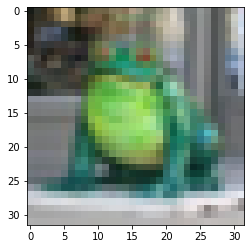

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(trainset.data[19])

### np.ndarray转为torch.Tensor

在深度学习中，原始图像需要转换为深度学习框架自定义的数据格式，在pytorch中，需要转为`torch.Tensor`。
pytorch提供了`torch.Tensor` 与`numpy.ndarray`转换为接口：

方法名|作用
--|--
`torch.from_numpy(xxx)`|`numpy.ndarray`转为torch.Tensor
`tensor1.numpy()`|获取tensor1对象的numpy格式数据

`torch.Tensor` 高维矩阵的表示： N x C x H x W

`numpy.ndarray` 高维矩阵的表示：N x H x W x C

因此在两者转换的时候需要使用`numpy.transpose( )` 方法 。


In [14]:
# numpy image: H x W x C
# torch image: C x H x W
# np.transpose( xxx,  (2, 0, 1))   # 将 H x W x C 转化为 C x H x W
tensor_skimage = torch.from_numpy(np.transpose(trainset.data[19], (2, 0, 1)))
tensor_skimage.size()

torch.Size([3, 32, 32])

### torch.Tensor转numpy.ndarray

In [15]:
# np.transpose( xxx,  (2, 0, 1))   # 将 C x H x W 转化为 H x W x C
img_skimage_2 = np.transpose(trainset[19][0].numpy(), (1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


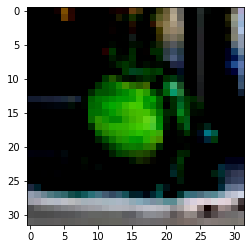

In [16]:
plt.imshow(img_skimage_2)

### 4.定义网络（ResNet-18/34/50/101/152）

ResNet网络是在2015年由微软实验室提出，斩获当年ImageNet竞赛中分类任务第一名，目标检测第一名。获得COCO数据集中目标检测第一名，图像分割第一名。下图是ResNet18层模型的结构简图。


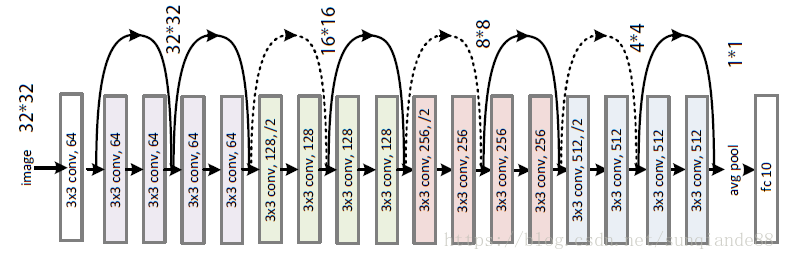


在ResNet网络中有如下几个亮点：

    （1）提出residual结构（残差结构），并搭建超深的网络结构(突破1000层)

    （2）使用Batch Normalization加速训练(丢弃dropout)

在ResNet网络提出之前，传统的卷积神经网络都是通过将一系列卷积层与下采样层进行堆叠得到的。但是当堆叠到一定网络深度时，就会出现两个问题。

    （1）梯度消失或梯度爆炸。 
    
    （2）退化问题(degradation problem)。
    
在ResNet论文中说通过数据的预处理以及在网络中使用BN（Batch Normalization）层能够解决梯度消失或者梯度爆炸问题，residual结构（残差结构）来减轻退化问题。此时拟合目标就变为F(x)，F(x)就是残差：


<img src="https://img-blog.csdn.net/2018042621572485?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3N1bnFpYW5kZTg4/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70" alt="残差模块" />


我们先对ResNet18/34的残差结构进行一个分析。如下图所示，该残差结构的主分支是由两层3x3的卷积层组成，而残差结构右侧的连接线是shortcut分支也称捷径分支（注意为了让主分支上的输出矩阵能够与我们捷径分支上的输出矩阵进行相加，必须保证这两个输出特征矩阵有相同的shape）。如果刚刚仔细观察了ResNet34网络结构图的同学，应该能够发现图中会有一些虚线的残差结构。在原论文中作者只是简单说了这些虚线残差结构有降维的作用，并在捷径分支上通过1x1的卷积核进行降维处理。而下图右侧给出了详细的虚线残差结构，注意下每个卷积层的步距stride，以及捷径分支上的卷积核的个数（与主分支上的卷积核个数相同）。

<img src="https://img-blog.csdnimg.cn/20200307115303893.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70" alt="ResNet18/34残差" />


接着我们再来分析下针对ResNet50/101/152的残差结构，如下图所示。在该残差结构当中，主分支使用了三个卷积层，第一个是1x1的卷积层用来压缩channel维度，第二个是3x3的卷积层，第三个是1x1的卷积层用来还原channel维度（注意主分支上第一层卷积层和第二次卷积层所使用的卷积核个数是相同的，第三次是第一层的4倍）。该残差结构所对应的虚线残差结构如下图右侧所示，同样在捷径分支上有一层1x1的卷积层，它的卷积核个数与主分支上的第三层卷积层卷积核个数相同，注意每个卷积层的步距。

<img src="https://img-blog.csdnimg.cn/20200307130433106.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70" alt="ResNet50/101/152残差" />


下面这幅图是原论文给出的不同深度的ResNet网络结构配置，注意表中的残差结构给出了主分支上卷积核的大小与卷积核个数，表中的xN表示将该残差结构重复N次。

<img src="https://img-blog.csdnimg.cn/20200307131256537.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NTQxMDk3,size_16,color_FFFFFF,t_70" alt="网络结构" />

对于我们ResNet18/34/50/101/152，表中conv3_x, conv4_x, conv5_x所对应的一系列残差结构的第一层残差结构都是虚线残差结构。因为这一系列残差结构的第一层都有调整输入特征矩阵shape的使命（将特征矩阵的高和宽缩减为原来的一半，将深度channel调整成下一层残差结构所需要的channel）。


In [17]:
import torch.nn as nn
import torch

#针对ResNet18/34的网络结构，同一个卷积层卷积数量不变
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channel, out_channel, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=out_channel,
                               kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channel)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=out_channel, out_channels=out_channel,
                               kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channel)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        #是否下采样
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        
        #这儿就是上面示意图中的残差结构，对比着观看加深理解
        out += identity
        out = self.relu(out)

        return out

#针对ResNet50/101/152的网络结构,主要是因为第三层是第二层的4倍的关系
class Bottleneck(nn.Module):   
    expansion = 4

    def __init__(self, in_channel, out_channel, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=out_channel,
                               kernel_size=1, stride=1, bias=False)  # squeeze channels
        self.bn1 = nn.BatchNorm2d(out_channel)
        # -----------------------------------------
        self.conv2 = nn.Conv2d(in_channels=out_channel, out_channels=out_channel,
                               kernel_size=3, stride=stride, bias=False, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channel)
        # -----------------------------------------
        self.conv3 = nn.Conv2d(in_channels=out_channel, out_channels=out_channel*self.expansion,
                               kernel_size=1, stride=1, bias=False)  # unsqueeze channels
        self.bn3 = nn.BatchNorm2d(out_channel*self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        out += identity
        out = self.relu(out)

        return out

    
#这就是正题了，整个残差网络结构
class ResNet(nn.Module):

    def __init__(self, block, blocks_num, num_classes=1000, include_top=True):
        super(ResNet, self).__init__()
        self.include_top = include_top
        self.in_channel = 64

        self.conv1 = nn.Conv2d(3, self.in_channel, kernel_size=7, stride=2,
                               padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channel)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        #使用_make_layer函数生成上表对应的conv2_x, conv3_x, conv4_x, conv5_x的结构
        self.layer1 = self._make_layer(block, 64, blocks_num[0])
        self.layer2 = self._make_layer(block, 128, blocks_num[1], stride=2)
        self.layer3 = self._make_layer(block, 256, blocks_num[2], stride=2)
        self.layer4 = self._make_layer(block, 512, blocks_num[3], stride=2)
        if self.include_top:
            self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # output size = (1, 1)
            self.fc = nn.Linear(512 * block.expansion, num_classes)
            
        #Pytorch 的Module都只带默认的初始化方法，而且初始化会调用此函数，因此我们定义好后，不用手动初始化。
        #初始化函数还是用的何凯名大神的kaiming_uniform_，真的牛逼。
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    
    #这里就是上表对应的conv2_x, conv3_x, conv4_x, conv5_x的结构
    def _make_layer(self, block, channel, block_num, stride=1):
        downsample = None
        if stride != 1 or self.in_channel != channel * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channel, channel * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(channel * block.expansion))
        
        #这里就是前面对应的BasicBlock或者Bottleneck
        layers = []
        layers.append(block(self.in_channel, channel, downsample=downsample, stride=stride))
        self.in_channel = channel * block.expansion

        for _ in range(1, block_num):
            layers.append(block(self.in_channel, channel))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        if self.include_top:
            x = self.avgpool(x)
            #x = x.view(x.size(0), -1)效果一样
            x = torch.flatten(x, 1)
            x = self.fc(x)

        return x
    
def resnet18(num_classes=10, include_top=True):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes, include_top=include_top)


def resnet34(num_classes=10, include_top=True):
    return ResNet(BasicBlock, [3, 4, 6, 3], num_classes=num_classes, include_top=include_top)


def resnet50(num_classes=10, include_top=True):
    return ResNet(Bottleneck, [3, 4, 6, 3], num_classes=num_classes, include_top=include_top)


def resnet101(num_classes=10, include_top=True):
    return ResNet(Bottleneck, [3, 4, 23, 3], num_classes=num_classes, include_top=include_top)


def resnet152(num_classes=10, include_top=True):
    return ResNet(Bottleneck, [3, 4, 36, 3], num_classes=num_classes, include_top=include_top)

In [18]:
#这里我只敢选择resnet18网络，其他会死机。
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = resnet18(num_classes=10, include_top=True).to(device)
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(64, 

### 5. 定义损失函数和优化器 
    pytorch将深度学习中常用的优化方法全部封装在torch.optim之中，所有的优化方法都是继承基类optim.Optimizier
    
    损失函数是封装在神经网络工具箱nn中的,包含很多损失函数


In [19]:
import torch.optim as optim
#用到了神经网络工具箱 nn 中的交叉熵损失函数
loss_function = nn.CrossEntropyLoss() 
# 使用SGD（随机梯度下降）优化，学习率为0.001，动量为0.9
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  

### 6. 训练

In [20]:
best_acc = 0.0
save_path = 'D:/CIFAR-10/model/ResNet18.pth'
for epoch in range(20):
    # train
    net.train()
    running_loss = 0.0
    for step, data in enumerate(trainloader, start=0):
        images, labels = data
        optimizer.zero_grad()
        logits = net(images.to(device))
        loss = loss_function(logits, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # print train process
        rate = (step+1)/len(trainloader)
        a = "*" * int(rate * 50)
        b = "." * int((1 - rate) * 50)
        print("\rtrain loss: {:^3.0f}%[{}->{}]{:.4f}".format(int(rate*100), a, b, loss), end="")
    print()

    # validate
    net.eval()
    acc = 0.0  # accumulate accurate number / epoch
    with torch.no_grad():
        for val_data in testloader:
            val_images, val_labels = val_data
            outputs = net(val_images.to(device))  # eval model only have last output layer
            # loss = loss_function(outputs, test_labels)
            predict_y = torch.max(outputs, dim=1)[1]
            acc += (predict_y == val_labels.to(device)).sum().item()
        val_accurate = acc / len(testset)
        if val_accurate > best_acc:
            best_acc = val_accurate
            torch.save(net.state_dict(), save_path)
        print('[epoch %d] train_loss: %.3f  test_accuracy: %.3f' %
              (epoch + 1, running_loss / step, val_accurate))

print('Finished Training')

train loss: 100%[**************************************************->]1.4360
[epoch 1] train_loss: 1.800  test_accuracy: 0.438
train loss: 100%[**************************************************->]1.3332
[epoch 2] train_loss: 1.413  test_accuracy: 0.491
train loss: 100%[**************************************************->]1.4379
[epoch 3] train_loss: 1.247  test_accuracy: 0.531
train loss: 100%[**************************************************->]1.2107
[epoch 4] train_loss: 1.105  test_accuracy: 0.539
train loss: 100%[**************************************************->]1.1990
[epoch 5] train_loss: 0.972  test_accuracy: 0.561
train loss: 100%[**************************************************->]1.0284
[epoch 6] train_loss: 0.839  test_accuracy: 0.574
train loss: 100%[**************************************************->]0.6718
[epoch 7] train_loss: 0.712  test_accuracy: 0.566
train loss: 100%[**************************************************->]0.6475
[epoch 8] train_loss: 0.582  test_

In [21]:
from torch.autograd import Variable
# 定义2个存储每类中测试正确的个数的 列表，初始化为0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    
    for data in testloader:
        net.eval()
        images, labels = data
        images=Variable(images).cuda()
        labels=Variable(labels).cuda()
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
    #4组(batch_size)数据中，输出于label相同的，标记为1，否则为0
        c = (predicted == labels).squeeze()
        for i in range(16):      # 因为每个batch都有4张图片，所以还需要一个4的小循环
            label = labels[i]   # 对各个类的进行各自累加
            class_correct[label] += c[i]
            class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 66 %
Accuracy of  bird : 42 %
Accuracy of   cat : 35 %
Accuracy of  deer : 56 %
Accuracy of   dog : 41 %
Accuracy of  frog : 66 %
Accuracy of horse : 62 %
Accuracy of  ship : 71 %
Accuracy of truck : 61 %


### 8. 保存模型

In [22]:
# torch.save(net, 'D:/CIFAR-10/model/ResNet18-128.pth')

### 9. 预测

In [23]:
import torch
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet18()

model.load_state_dict(torch.load('D:/CIFAR-10/model/ResNet18.pth'))# 加载模型
model = model.to(device)
model.eval()  # 把模型转为test模式

# 读取要预测的图片
img = Image.open("D:/CIFAR-10/images/4.1.jpg").convert('RGB') # 读取图像

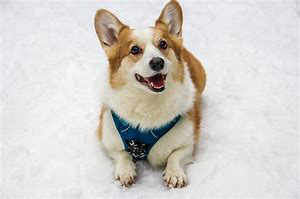

In [24]:
img

In [25]:
trans = transforms.Compose([transforms.Scale((32,32)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.5, 0.5, 0.5), 
                                                 std=(0.5, 0.5, 0.5)),
                           ])
 
img = trans(img)
img = img.to(device)
# 图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
img = img.unsqueeze(0)  
    # 扩展后，为[1，1，28，28]
output = model(img)
prob = F.softmax(output,dim=1) #prob是10个分类的概率
print("概率",prob)
value, predicted = torch.max(output.data, 1)
print("类别",predicted.item())
print(value)
pred_class = classes[predicted.item()]
print("分类",pred_class)
 
 
 
    # prob = F.softmax(output, dim=1)
    # prob = Variable(prob)
    # prob = prob.cpu().numpy()  # 用GPU的数据训练的模型保存的参数都是gpu形式的，要显示则先要转回cpu，再转回numpy模式
    # print(prob)  # prob是10个分类的概率
    # pred = np.argmax(prob)  # 选出概率最大的一个
    # # print(pred)
    # # print(pred.item())
    # pred_class = classes[pred]
    # print(pred_class)

概率 tensor([[1.4234e-02, 5.2874e-05, 1.8102e-03, 5.2641e-02, 2.8497e-01, 8.3482e-03,
         4.7815e-05, 6.3280e-01, 2.8537e-03, 2.2486e-03]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)
类别 7
tensor([4.5116], device='cuda:0')
分类 horse


D:\Anaconda3\lib\site-packages\torchvision\transforms\transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
